In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.linear_model import LinearRegression
import numpy as np

In [81]:
all_data = pd.read_pickle('./data/season_data_no_singletons.pkl')

print(all_data)
# all_data = all_data.drop_duplicates(subset=['Team', 'Opponent'])
# all_data = all_data.groupby(['Team', 'Opponent'], as_index=False).mean()
# Group by 'Date', 'Team', and 'Opponent' 


all_data

                     Date    Type Opponent    Tm    Opp  \
0     2023-11-06 00:00:00     REG    UConn  52.0   95.0   
1     2023-11-11 00:00:00     REG    UConn  67.0  107.0   
2     2023-11-14 00:00:00     REG    UConn  53.0   87.0   
3     2023-11-19 00:00:00     REG    UConn  57.0   77.0   
4     2023-11-20 00:00:00     REG    UConn  71.0   81.0   
...                   ...     ...      ...   ...    ...   
2370  2024-02-29 00:00:00     REG   Wagner  70.0   56.0   
2371  2024-03-02 00:00:00     REG   Wagner  57.0   54.0   
2372  2024-03-06 00:00:00  CTOURN   Wagner  57.0   60.0   
2373  2024-03-09 00:00:00  CTOURN   Wagner  56.0   66.0   
2374  2024-03-12 00:00:00  CTOURN   Wagner  47.0   54.0   

                           Team  Diff  
0              Northern Arizona -43.0  
1                     Stonehill -40.0  
2      Mississippi Valley State -34.0  
3                       Indiana -20.0  
4                         Texas -10.0  
...                         ...   ...  
2370       

,Date,Type,Opponent,Tm,Opp,Team,Diff
0,2023-11-06 00:00:00,REG,UConn,52.0,95.0,Northern Arizona,-43.0
1,2023-11-11 00:00:00,REG,UConn,67.0,107.0,Stonehill,-40.0
2,2023-11-14 00:00:00,REG,UConn,53.0,87.0,Mississippi Valley State,-34.0
3,2023-11-19 00:00:00,REG,UConn,57.0,77.0,Indiana,-20.0
4,2023-11-20 00:00:00,REG,UConn,71.0,81.0,Texas,-10.0
...,...,...,...,...,...,...,...
2370,2024-02-29 00:00:00,REG,Wagner,70.0,56.0,Le Moyne,14.0
2371,2024-03-02 00:00:00,REG,Wagner,57.0,54.0,FDU,3.0
2372,2024-03-06 00:00:00,CTOURN,Wagner,57.0,60.0,Sacred Heart,-3.0
2373,2024-03-09 00:00:00,CTOURN,Wagner,56.0,66.0,Central Connecticut State,-10.0


[('Northern Arizona', 'UConn', {'weight': 95.0, 'id': 0}), ('Northern Arizona', 'Grand Canyon', {'weight': 89.0, 'id': 1612}), ('Northern Arizona', 'Montana State', {'weight': 71.0, 'id': 2262}), ('UConn', 'Northern Arizona', {'weight': 52.0, 'id': 0}), ('UConn', 'Stonehill', {'weight': 67.0, 'id': 1}), ('UConn', 'Mississippi Valley State', {'weight': 53.0, 'id': 2}), ('UConn', 'Indiana', {'weight': 57.0, 'id': 3}), ('UConn', 'Texas', {'weight': 71.0, 'id': 4}), ('UConn', 'Manhattan', {'weight': 60.0, 'id': 5}), ('UConn', 'New Hampshire', {'weight': 64.0, 'id': 6}), ('UConn', 'Kansas', {'weight': 69.0, 'id': 7}), ('UConn', 'North Carolina', {'weight': 76.0, 'id': 8}), ('UConn', 'Arkansas-Pine Bluff', {'weight': 63.0, 'id': 9}), ('UConn', 'Gonzaga', {'weight': 63.0, 'id': 10}), ('UConn', 'Seton Hall', {'weight': 61.0, 'id': 28}), ('UConn', "St. John's", {'weight': 90.0, 'id': 32}), ('UConn', 'DePaul', {'weight': 65.0, 'id': 24}), ('UConn', 'Butler', {'weight': 62.0, 'id': 22}), ('UConn'

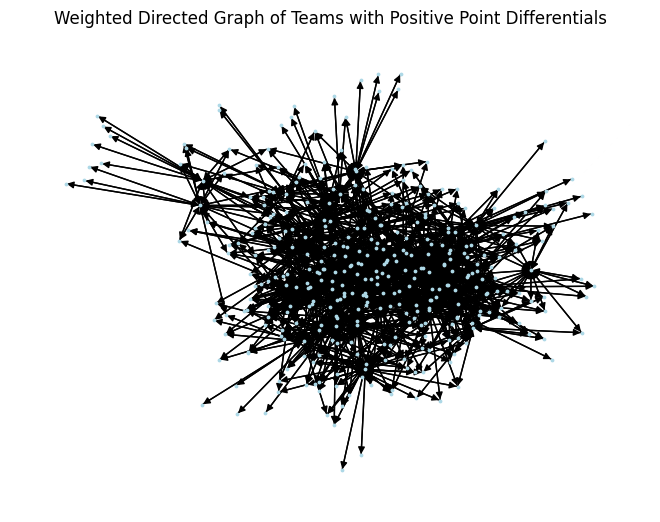

In [82]:
df = all_data.copy()

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph based on the positive point differential
for index, row in df.iterrows():
    # if row['Diff'] > 0:
    G.add_edge(row['Team'], row['Opponent'], weight=row['Opp'], id=index)
    # else:
    G.add_edge(row['Opponent'], row['Team'], weight=row['Tm'], id=index)

print(list(G.edges(data=True)))


# Draw the graph with edge labels (weights)
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=3, node_color='lightblue', font_size=1, font_color='black', font_weight='bold', arrows=True, arrowstyle='-|>', arrowsize=10)
# edge_labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Weighted Directed Graph of Teams with Positive Point Differentials")
plt.show()


In [ ]:


def random_edge_subgraph(graph, drop_rate):
    # Collect all edges in the graph with their data
    all_edges = list(graph.edges(data=True))
    sample_size = int(graph.number_of_edges() * (1 - drop_rate))
    sample_edges = random.sample(all_edges, sample_size)
    sample_ids = {data['id'] for u, v, data in sample_edges}

    def filter_edges(u, v):
        data = graph.get_edge_data(u, v)
        return data['id'] in sample_ids

    subgraph = nx.subgraph_view(graph, filter_edge=filter_edges)
    
    return subgraph, sample_edges


def calc_error(ranks, edges):
        # populate edge pairs
        errors = []
        edge_groups = {}
        for u, v, data in edges:
            edge_id = data['id']
            if edge_id not in edge_groups:
                edge_groups[edge_id] = []
            edge_groups[edge_id].append((u, v, data))

        for edge_id, edges in edge_groups.items():
            if len(edges) == 2:
                u, v, d1 = edges[0]
                v, u, d2 = edges[1]
                w1, w2 = d1['weight'], d2['weight']
                pr_u, pr_v = ranks.get(u, 0), ranks.get(v, 0)
                errors.append(w1*pr_u - w2*pr_v)
        return sum([err**2 for err in errors]) / len(errors)

def evaluate_inlier_status(rank, graph_edges, t):
    confirmed_inliers = []
    # populate edge pairs
    edge_groups = {}
    for u, v, data in graph_edges:
        edge_id = data['id']
        if edge_id not in edge_groups:
            edge_groups[edge_id] = []
        edge_groups[edge_id].append((u, v, data))

    # Evaluate all edges for inlier status
    for edge_id, edges in edge_groups.items():
        if len(edges) == 2:
            u, v, d1 = edges[0]
            v, u, d2 = edges[1]
            w1, w2 = d1['weight'], d2['weight']
            pr_u, pr_v = rank.get(u, 0), rank.get(v, 0)
            # print(w1*pr_u - w2*pr_v)
            if abs(w1*pr_u - w2*pr_v) < t:
                confirmed_inliers.extend(edges)
    return confirmed_inliers


def ransac(graph, num_iters=100, drop_rate=0.2):

    best_model = None
    best_err = 10**8
    t = 0.5
    inlier_threshold = 0.7

    sample_ranks = np.zeros((num_iters, len(graph.nodes())))
    for i in range(num_iters):
        # random subgraph selection
        subgraph, _ = random_edge_subgraph(graph, drop_rate)

        # fit model to subgraph
        sample_pagerank = nx.pagerank(subgraph, weight='weight', max_iter=100, alpha=0.95)        
        sample_rank = np.array([sample_pagerank[node] for node in subgraph.nodes()])
        sample_ranks[i,:] = sample_rank  # keep track of ranks

        # determine which are inliers
        confirmed_inliers = evaluate_inlier_status(sample_pagerank, subgraph.edges(data=True), t)  
        
        # if enough inliers for good model
        # print(len(confirmed_inliers))
        print(len(confirmed_inliers) / len(graph.edges()))
        if len(confirmed_inliers) >  inlier_threshold*len(graph.edges()):
            inlier_subgraph = nx.DiGraph()
            inlier_subgraph.add_nodes_from(graph.nodes())
            inlier_subgraph.add_edges_from(confirmed_inliers)

            better_model = nx.pagerank(inlier_subgraph, weight='weight', max_iter=100, alpha=0.95)            
            this_err = calc_error(better_model, inlier_subgraph.edges(data=True))

            if this_err < best_err:
                best_model = better_model
                best_err = this_err

    if best_model is None:
        raise Exception("No inliers found; try different values for num_iters and drop_rate")
    else:
        return best_model, best_err, sample_ranks



In [ ]:
best_model, best_err, sample_ranks = ransac(G, num_iters=100, drop_rate=0.1)

print(best_err)      
for elt in sorted(list(best_model.items()), key=lambda x: -x[1]):
    print(elt)

sample_vars = np.mean(np.var(sample_ranks, axis=0, ddof=1))
model = nx.pagerank(G, weight='weight', max_iter=100, alpha=0.95)

0.8207964601769911
0.8075221238938053
0.8119469026548672
0.8207964601769911
0.8089970501474927
0.8178466076696165
0.8141592920353983
0.8178466076696165
0.8119469026548672
0.8171091445427728
0.8097345132743363
0.8148967551622419
0.8126843657817109
0.8119469026548672
0.8193215339233039
0.8171091445427728
0.8134218289085545
0.8119469026548672
0.8067846607669616
0.8200589970501475
0.81047197640118
0.8171091445427728
0.8148967551622419
0.8134218289085545
0.8134218289085545
0.8230088495575221
0.8119469026548672
0.8134218289085545
0.8163716814159292
0.8163716814159292
0.8112094395280236
0.8134218289085545
0.8185840707964602
0.8148967551622419
0.8171091445427728
0.8067846607669616
0.8185840707964602
0.8067846607669616
0.8200589970501475
0.81047197640118
0.8089970501474927
0.8141592920353983
0.8207964601769911
0.8112094395280236
0.81047197640118
0.8163716814159292
0.8185840707964602
0.8119469026548672
0.8163716814159292
0.81047197640118
0.8185840707964602
0.8178466076696165
0.8119469026548672
0

In [ ]:
teams = sorted(best_model.keys())
skill = np.zeros(len(teams))

for i, elt in enumerate(sorted(best_model.items(), key=lambda x: x[0])):
    skill[i] = elt[1]

[0.00111577 0.00234092 0.00823266 0.00839358 0.00086019 0.00080894
 0.00061697 0.00162485 0.00059555 0.00014624 0.00948319 0.00321359
 0.00364311 0.00110421 0.00148065 0.00052067 0.00937586 0.00079822
 0.01013898 0.00996864 0.00044209 0.00062288 0.0010506  0.00119403
 0.00879016 0.00186909 0.00129741 0.00127891 0.00228584 0.00251818
 0.00145624 0.00081025 0.0014     0.0013082  0.00229093 0.00053743
 0.00094189 0.00132624 0.00099332 0.0026458  0.00116192 0.00014624
 0.00055591 0.00048259 0.00123613 0.00077398 0.00137034 0.00097197
 0.00096862 0.00133257 0.00505412 0.00902643 0.00094548 0.00014624
 0.00828711 0.00082527 0.005695   0.00972718 0.00892177 0.00014624
 0.00117512 0.00049741 0.00943846 0.00120544 0.00050526 0.00528453
 0.00366188 0.00156077 0.00055574 0.00094833 0.00771314 0.00805441
 0.00923524 0.00089775 0.00097164 0.0012994  0.0011815  0.00138268
 0.00128409 0.00059515 0.00078072 0.00092749 0.00098158 0.00142413
 0.00754357 0.00273611 0.00615086 0.00050179 0.00186836 0.0028

# Count Wins / Losses

In [ ]:
# get season data incl singletons and calculate records
szn = pd.read_pickle('./data/season_data.pkl')

records = {}

for index, row in df.iterrows():
    team = row['Team']
    opponent = row['Opponent']
    team_score = row['Tm']
    opponent_score = row['Opp']
    
    if team not in records:
        records[team] = {'wins': 0, 'losses': 0}
    if opponent not in records:
        records[opponent] = {'wins': 0, 'losses': 0}
    
    if team_score > opponent_score:
        records[team]['wins'] += 1
        records[opponent]['losses'] += 1
    else:
        records[team]['losses'] += 1
        records[opponent]['wins'] += 1


r = np.zeros(len(records))
w = np.zeros(len(records))
l = np.zeros(len(records))
t = sorted(list(records.keys()))
for i, elt in enumerate(sorted(records.items(), key=lambda x: x[0])):
    w[i] = elt[1]['wins']
    l[i] = elt[1]['losses']


# remove teams w one game played

# Combine 'Team' and 'Opponent' columns to count games played
all_teams = pd.concat([szn['Team'], szn['Opponent']])

# Count the number of games each team has played
team_game_counts = all_teams.value_counts()


# # Filter teams that have played more than one game
t = np.array(t)
filtered_names = t[w+l > 1]
filtered_w = w[w+l > 1]
filtered_l = l[w+l > 1]

print(len(filtered_l), len(filtered_w), len(filtered_names))

print(len(skill))


422
359 359 359
359


# Regression

Intercept: -4.969204038367085e-05
Coefficients: [0.0002704  0.00025889]


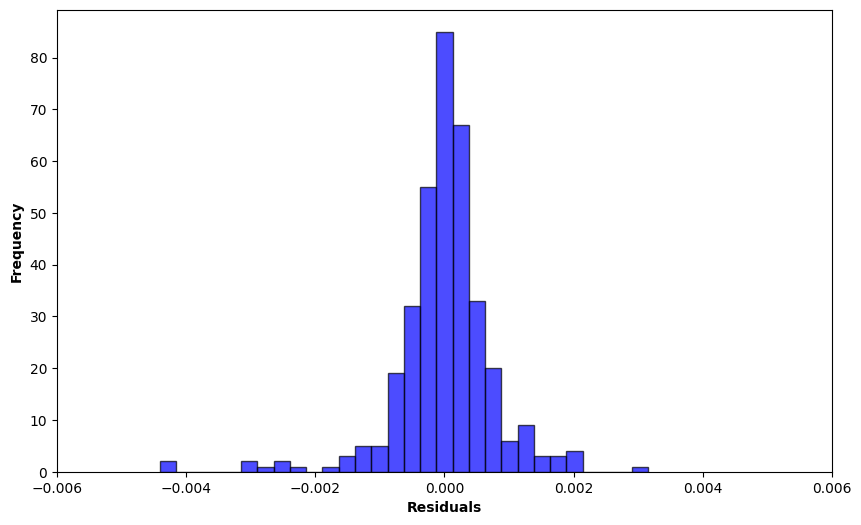

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [ ]:
# Combine wins and losses into a single array
X = np.column_stack((filtered_w, filtered_l))
Y = skill

model = LinearRegression().fit(X, Y)

# Get the predicted values 
Y_pred = model.predict(X) # Calculate the residuals
residuals = Y - Y_pred

# Extract the coefficients
intercept = model.intercept_
coefficients = model.coef_

print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficients}')
# plt.plot(residuals)
plt.style.use('default')  # Use a predefined style

plt.figure(figsize=(10,6))
plt.hist(residuals, bins=30, color='blue', edgecolor='black', alpha=0.7) 
# plt.title('Histogram of Residuals') 
plt.xlabel('Residuals', fontweight='bold') 
plt.ylabel('Frequency', fontweight='bold')
# plt.grid(True) 
plt.xlim((-0.006, 0.006))
plt.show()

from scipy.stats import norm

_, std = norm.fit(residuals)


# Plotting

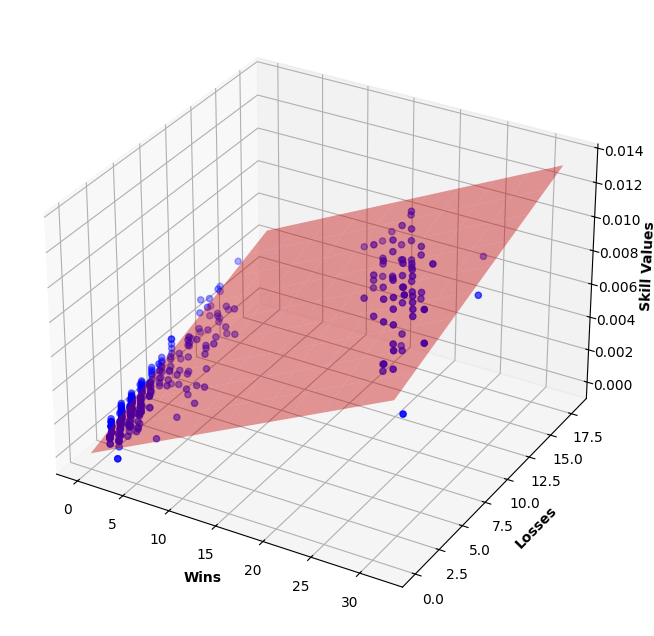

In [ ]:
import matplotlib.pyplot as plt

# Create a 3D scatter plot
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual data points
ax.scatter(w, l, skill, color='blue', marker='o', label='Actual')

# Generate a grid for the predicted plane
x_surf, y_surf = np.meshgrid(np.linspace(w.min(), w.max(), 10), np.linspace(l.min(), l.max(), 10))
z_surf = intercept + coefficients[0] * x_surf + coefficients[1] * y_surf

# Plot the predicted plane
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.4)

# Labels and title
ax.set_xlabel('Wins', fontweight='bold')
ax.set_ylabel('Losses', fontweight='bold')
ax.set_zlabel('Skill Values', fontweight='bold')

# plt.legend()
plt.show()


514.3486182344454 514.3483575114709


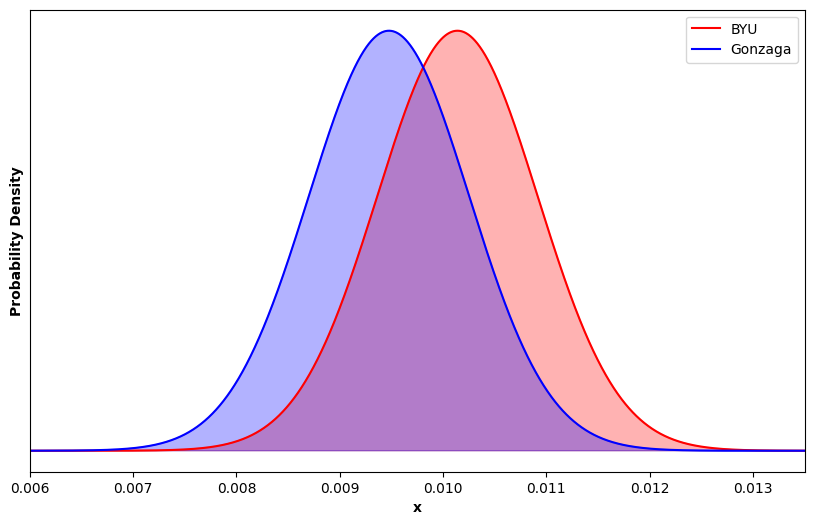

In [179]:
import scipy.stats as stats


def plot_graphs(mu_A, mu_B, std):
    # Define the mean and common standard deviation for Team A and Team B

    # Generate a range of x values
    x = np.linspace(-0.1, 0.1, 100000)

    # Calculate the probability density function (PDF) for each distribution
    pdf1 = stats.norm.pdf(x, mu_A, std)
    pdf2 = stats.norm.pdf(x, mu_B, std)

    print(max(pdf1), max(pdf2))

    # Plot the first distribution
    plt.figure(figsize=(10,6))
    plt.plot(x, pdf1, 'r', label=f'BYU')
    plt.fill_between(x, pdf1, color='red', alpha=0.3)

    # Plot the second distribution
    plt.plot(x, pdf2, 'b', label=f'Gonzaga')
    plt.fill_between(x, pdf2, color='blue', alpha=0.3)

    # Add labels and title
    # plt.ylim((0,0.000000000000000000000000005))
    min_mu = min(mu_A, mu_B)
    max_mu = max(mu_A, mu_B)
    plt.xlim((0.006, 0.0135))
    plt.xlabel('x', fontweight='bold')
    plt.ylabel('Probability Density', fontweight='bold')
    # plt.title('Normal Distributions')
    plt.legend()
    plt.yticks([])
    # Show the plot
    plt.show()
    

plot_graphs(best_model['BYU'], best_model['Gonzaga'], std)

In [181]:
def calc_odds(mu_A, mu_B, std):
    # Calculate the probability of Team A winning
    z = (mu_B - mu_A) / np.sqrt(np.sqrt(2) * std)
    prob_A_wins = 1 - stats.norm.cdf(z)
    
    return prob_A_wins, 1-prob_A_wins

calc_odds(best_model['BYU'], best_model['Gonzaga'], std)

(np.float64(0.5079817837069176), np.float64(0.4920182162930824))

# Match and Tournament Simulation

In [250]:
def simulate_match(team1, team2, p1):
    
    return team1 if np.random.rand() < p1 else team2

def simulate_tournament(teams, seeds):
    current_round_teams = sorted(zip(seeds, teams))
    current_round_teams = [team for seed, team in current_round_teams]
    
    while len(current_round_teams) > 1:
        next_round_teams = []
        for i in range(0, len(current_round_teams), 2):
            team1 = current_round_teams[i]
            team2 = current_round_teams[i + 1]
            p1, _ = calc_odds(best_model[team1], best_model[team2], std)
            winner = simulate_match(team1, team2, p1)
            next_round_teams.append(winner)
        current_round_teams = next_round_teams
        
    return current_round_teams[0]

# Example usage
teams = ['UConn', 'Iowa State', 'Illinois', 'Auburn', 'San Diego State', 'BYU', 'Washington State', 'Florida Atlantic', 'Northwestern', 'Drake', 'Duquesne', 'UAB', 'Yale', 'Morehead State', 'South Dakota State', 'Stetson']
seeds = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

# winner = simulate_tournament(teams, seeds)
# print(f"The winner of the simulated tournament is: {winner}")


def calculate_tournament_probabilities(teams, seeds, num_simulations=100):
    win_counts = {team: 0 for team in teams}
    
    for _ in range(num_simulations):
        winner = simulate_tournament(teams, seeds)
        win_counts[winner] += 1
    
    win_probabilities = {team: count / num_simulations for team, count in win_counts.items()}
    return win_probabilities

# Run simulations
num_simulations = 100000
win_probabilities = calculate_tournament_probabilities(teams, seeds, num_simulations)

# Print the win probabilities
print("Win probabilities for each team:")
for team, prob in win_probabilities.items():
    print(f"{team}: {prob:.2%}")



Win probabilities for each team:
UConn: 6.74%
Iowa State: 7.87%
Illinois: 6.04%
Auburn: 6.43%
San Diego State: 6.88%
BYU: 7.07%
Washington State: 6.49%
Florida Atlantic: 4.62%
Northwestern: 7.43%
Drake: 5.86%
Duquesne: 7.15%
UAB: 4.07%
Yale: 6.06%
Morehead State: 5.78%
South Dakota State: 6.29%
Stetson: 5.22%


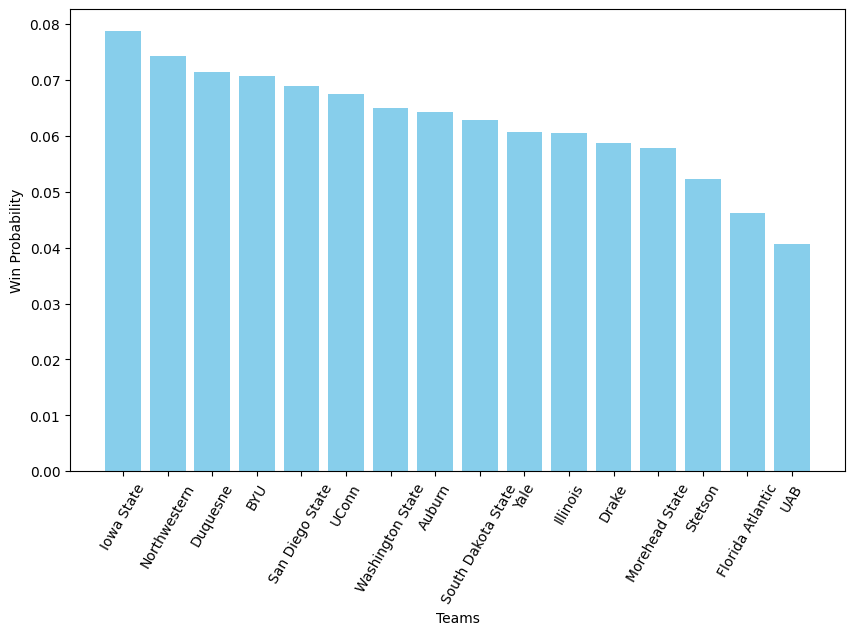

In [253]:
import matplotlib.pyplot as plt

# Sort the win probabilities
sorted_teams = sorted(win_probabilities.items(), key=lambda item: item[1], reverse=True)
sorted_teams = dict(sorted_teams)

# Extract team names and their probabilities
teams = list(sorted_teams.keys())
probabilities = list(sorted_teams.values())

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(teams, probabilities, color='skyblue')
plt.xlabel('Teams')
plt.ylabel('Win Probability')
# plt.title('Win Probabilities for Each Team')
# plt.ylim(0, 1)
# plt.grid(axis='y')
plt.xticks(rotation=60)
# Display the bar graph
plt.show()
